# Explorative Datenanalyse

In [1]:
%pip install numpy
%pip install pandas
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import Data

In [4]:
products_source = pd.read_csv('data/products.csv')
stores_source   = pd.read_csv('data/stores.csv')

In [5]:
transaction_lines_test_source   = pd.read_parquet('data/transaction_lines_test_1.parquet')
transaction_lines_train_source  = pd.read_parquet('data/transaction_lines_train_1.parquet')
transactions_test_source        = pd.read_parquet('data/transactions_test_1.parquet')
transactions_train_source       = pd.read_parquet('data/transactions_train_1.parquet')

In [6]:
products_source.head()

,id,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted
0,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,CONVENIENCE,2.49,0.121549,2024-10-29,2025-01-06,False,0.500000,False
1,608a870f-f898-486c-b66d-8979855c1cbb,608a870f-f898-486c-b66d-8979855c1cbb,FRUITS_VEGETABLES,12.79,0.015492,2013-12-27,2014-07-16,True,NaN,False
2,3758a745-6170-4650-ad9d-0f8b6c6b781d,3758a745-6170-4650-ad9d-0f8b6c6b781d,LONG_SHELF_LIFE,1.79,0.139815,2023-02-11,2023-05-09,False,0.500000,False
3,d5579e9a-8fd4-4ca5-a902-88348d8e0130,d5579e9a-8fd4-4ca5-a902-88348d8e0130,FRUITS_VEGETABLES_PIECES,1.49,0.148460,2023-09-03,2023-09-24,False,1.397181,False
4,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,FROZEN_GOODS,2.49,0.121549,2011-05-05,2013-08-27,False,1.630000,False


In [7]:
stores_source.head()

,id,opening_date,location,state,urbanization,sco_introduction
0,664c9b33-0553-4050-9dff-5afc3aa3334b,2006-06-19,Karlsruhe,Baden-Württemberg,TOWNS,2022-02-13
1,29b64dcc-72e4-4dc9-b482-b169a7e9037f,1993-10-01,Bielefeld,Nordrhein-Westfalen,CITIES,2022-02-28
2,b0973ffa-ce15-41e0-9de7-1390598e24f2,2005-06-02,Berlin,Berlin,RURAL,2022-02-02
3,88a1ecdf-2fe9-4517-88ea-170959aad9bb,2006-08-11,Leipzig,Sachsen,TOWNS,2022-03-11
4,d3892a9e-8cbc-4237-be9c-211435dc92c0,2003-02-10,München,Bayern,TOWNS,2022-02-08


In [8]:
transaction_lines_train_source.head()

,id,transaction_id,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty
0,1,107398f1-e808-4a65-835e-2d22593d727a,bcc0362e-77a8-4f7e-9b8c-9b07dcd05ba9,2022-02-02 09:04:02.006481,27.0,32.13,False,False,0.283942
1,2,107398f1-e808-4a65-835e-2d22593d727a,bd0d7a73-a63d-45ca-924c-4077131bd003,2022-02-02 09:04:07.190344,24.0,30.96,False,True,0.246889
2,3,107398f1-e808-4a65-835e-2d22593d727a,a047c7f4-ef06-4668-85a4-a2dbd8c8d8c0,2022-02-02 09:04:09.745149,1.0,6.19,False,True,0.296224
3,4,107398f1-e808-4a65-835e-2d22593d727a,3005b329-8338-48a1-8470-512576a26c5f,2022-02-02 09:04:23.502562,20.0,19.80,False,False,0.301462
4,5,107398f1-e808-4a65-835e-2d22593d727a,57f7058a-21d8-4ace-b884-d65c945470cc,2022-02-02 09:04:27.649226,7.0,2.03,False,False,0.227181


In [9]:
transactions_train_source.head()

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label
0,5bedf771-f016-41a7-ab89-f40e7f6be955,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:00:12,2022-02-02 08:01:02.825563,52.26,6,CREDIT_CARD,NaN,NaN,UNKNOWN
1,21ff1406-dbc4-41a7-8429-836cbf96d853,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 08:05:06,2022-02-02 08:05:30.565876,1.47,1,CREDIT_CARD,NaN,NaN,UNKNOWN
2,b642f9b6-43b5-413d-ad08-b4bf4b664b52,b0973ffa-ce15-41e0-9de7-1390598e24f2,2,2022-02-02 08:07:12,2022-02-02 08:11:29.434607,363.87,37,CREDIT_CARD,NaN,0.0,NORMAL
3,16aa01c9-9678-4c6d-a007-baa3429b9fb8,b0973ffa-ce15-41e0-9de7-1390598e24f2,3,2022-02-02 08:11:45,2022-02-02 08:12:07.881710,3.43,1,CREDIT_CARD,NaN,NaN,UNKNOWN
4,0add22e5-6794-4e95-9d25-a1cd6b6cd083,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:15:15,2022-02-02 08:19:30.611551,441.40,47,CREDIT_CARD,NaN,NaN,UNKNOWN


In [10]:
transactions_train_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558245 entries, 0 to 1558244
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1558245 non-null  object        
 1   store_id           1558245 non-null  object        
 2   cash_desk          1558245 non-null  int64         
 3   transaction_start  1558245 non-null  datetime64[us]
 4   transaction_end    1558245 non-null  datetime64[us]
 5   total_amount       1558245 non-null  float64       
 6   n_lines            1558245 non-null  int64         
 7   payment_medium     1558245 non-null  object        
 8   customer_feedback  108330 non-null   float64       
 9   damage             155692 non-null   float64       
 10  label              1558245 non-null  object        
dtypes: datetime64[us](2), float64(3), int64(2), object(4)
memory usage: 130.8+ MB


In [11]:
transaction_lines_train_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620157 entries, 0 to 16620156
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      int64         
 1   transaction_id          object        
 2   product_id              object        
 3   timestamp               datetime64[us]
 4   pieces_or_weight        float64       
 5   sales_price             float64       
 6   was_voided              bool          
 7   camera_product_similar  object        
 8   camera_certainty        float64       
dtypes: bool(1), datetime64[us](1), float64(3), int64(1), object(3)
memory usage: 1.0+ GB


# Rough profit estimation

So firstly we seem to have training data for individual products ( transactions ) and for

In diesem abschnitt soll eine notewendige Übersicht gefunden werden um dann im Anschluss eine Grobe abschätzung vom möglichen Mehrwert einer "Fraud Detection" machen zu können.

## Übersicht

Wir scheinen zwei wichtige arten von Trainingsdaten zu haben. Eine Tabelle, die den Kauf einzelner Produkte auflistet und eine die einkäufe listet, also eine sammlung von Produkten.

Die erste Frage, die ich beantworten möchte ist. In die fern hängen diese Tabellen zusammen. Sind die einzelnen produkte genau diejenigen aus den einkäufen?

In [12]:
merged_inner_df = pd.merge(
    transaction_lines_train_source,
    transactions_train_source,
    left_on='transaction_id',
    right_on='id',
    how='inner'
)

In [13]:
merged_outer_df = pd.merge(
    transaction_lines_train_source,
    transactions_train_source,
    left_on='transaction_id',
    right_on='id',
    how='outer'
)

In [14]:
transaction_lines_train_source.shape[0]

16620157

In [15]:
transactions_train_source.shape[0]

1558245

In [16]:
merged_inner_df.shape[0]

16620157

In [17]:
merged_outer_df.shape[0]

16620173

Die Analyse der Merge-Ergebnisse zeigt Folgendes:

1.  **Inner Join:** Die Anzahl der Zeilen im Ergebnis des `inner join` (16.620.157) ist identisch mit der Zeilenanzahl der `transaction_lines_train_source`. Dies belegt, dass jede einzelne Zeile in `transaction_lines_train_source` eine übereinstimmende Transaktion in `transactions_train_source` anhand der Schlüssel `transaction_id` und `id` hat. Es gibt also keine "verwaisten" Transaktionszeilen.

2.  **Outer Join:** Das Ergebnis des `outer join` hat 16.620.173 Zeilen, also 16 Zeilen mehr als der `inner join` und die `transaction_lines_train_source`. Da alle Zeilen aus der Lines-Tabelle bereits im `inner join` enthalten waren, müssen diese zusätzlichen 16 Zeilen von `transactions_train_source` stammen.

**Schlussfolgerung:** Die Datenintegrität ist von den Transaktionszeilen zu den Transaktionen hin gegeben (jede Zeile hat eine Transaktion). Es existieren jedoch 16 Transaktionen in `transactions_train_source`, die keine zugehörigen Einträge in `transaction_lines_train_source` haben (z.B. leere oder stornierte Transaktionen).

## Fraud Zeitspanne

Die Tainingsdaten geben ein Label für "FRAUD", "NORMAL" und "UNKNOWN" einkäufe. Für einzelne Produkte gibt es auch interessante möglichkeiten der Analyse, sprich das Gewicht der Prokukte und die Bilderkennung. Die einzelnen profukte mit in die Analyse einzubringen würde aber eine tiefere analyse benötigen. Also konzentrieren wir uns hier erstmal auf die liste der gesammten Einkäufe.

In [18]:
transactions_train_source['label'].value_counts()

label
UNKNOWN    1402553
NORMAL      150692
FRAUD         5000
Name: count, dtype: int64

In [19]:
labeled_transactions_df = transactions_train_source[transactions_train_source['label'] != 'UNKNOWN'].copy()

In [20]:
labeled_transactions_df['label'].value_counts()

label
NORMAL    150692
FRAUD       5000
Name: count, dtype: int64

The percentage of fraudulant transactions.

In [21]:
fraud_count = (labeled_transactions_df['label'] == 'FRAUD').sum()
total_labeled_count = len(labeled_transactions_df)
fraud_percent = float(fraud_count / total_labeled_count)
print(f'In the labeled data {  fraud_percent * 100 } % of the transactions are fraudulent.')

In the labeled data 3.211468797369165 % of the transactions are fraudulent.


The time span and distribution of the transactions.

In [22]:
min_time = transactions_train_source['transaction_start'].min()
max_time = transactions_train_source['transaction_end'].max()
time_span = max_time - min_time

print(f"Earliest Transaction Start: {min_time}")
print(f"Latest Transaction End:   {max_time}")
print(f"Total Time Span Covered:  {time_span}")

Earliest Transaction Start: 2022-02-02 08:00:12
Latest Transaction End:   2023-12-30 22:01:13.269469
Total Time Span Covered:  696 days 14:01:01.269469


In [23]:
daily_counts = transactions_train_source['transaction_start'].dt.floor('D').value_counts().sort_index()
print(f"\nAverage transactions per day: {daily_counts.mean():.2f}. Which will intail an average of {daily_counts.mean() * fraud_percent} fraudulent fransacion per day.")


Average transactions per day: 2677.40. Which will intail an average of 85.9837662569848 fraudulent fransacion per day.


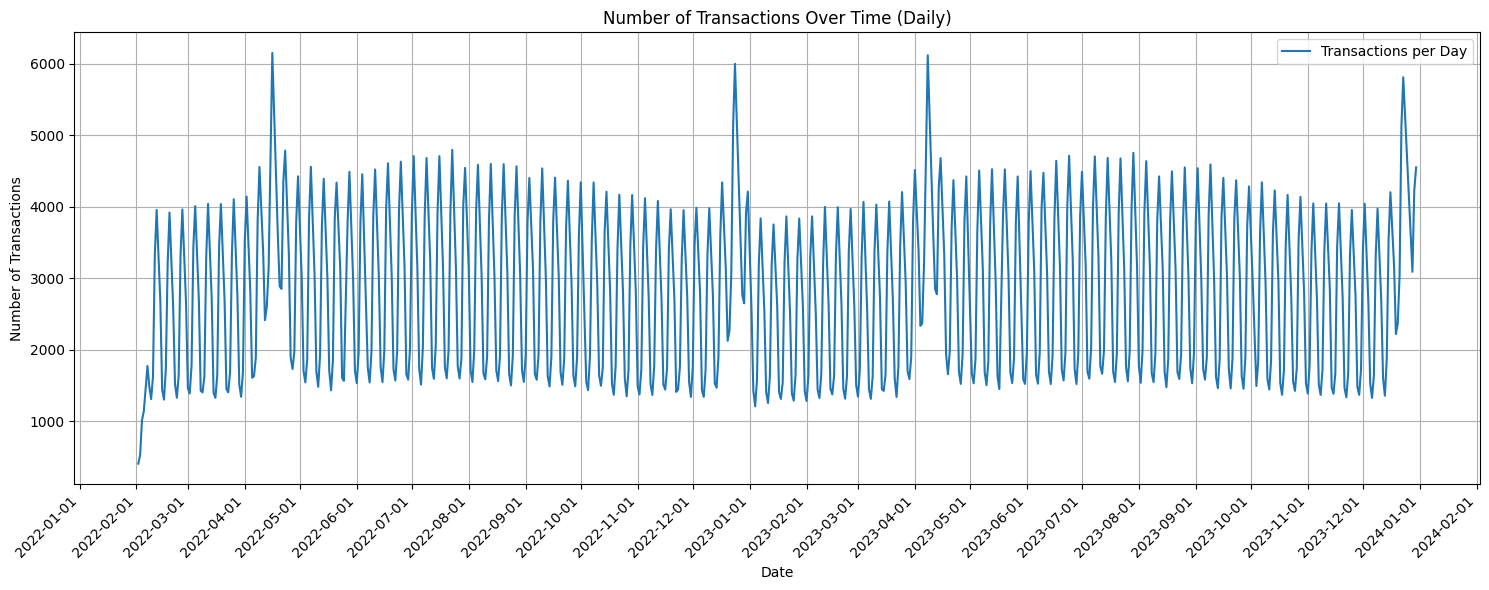

In [24]:
fig, ax = plt.subplots(figsize=(15, 6)) # Use subplots for better axis control
daily_counts.plot(kind='line', ax=ax, label='Transactions per Day')
ax.set_title('Number of Transactions Over Time (Daily)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Transactions')
ax.grid(True)
ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fraud höhe or schaden

In [25]:
damaged_transactions_df = transactions_train_source[transactions_train_source['damage'].notna() & transactions_train_source['damage'] > 0].copy()
print(f"Found {len(damaged_transactions_df)} transactions with damage information.")

Found 5000 transactions with damage information.


Time Span of Damaged Transactions.

In [26]:
min_damage_time = damaged_transactions_df['transaction_start'].min()
max_damage_time = damaged_transactions_df['transaction_end'].max()
damage_time_span = max_damage_time - min_damage_time

print(f"Earliest Damaged Transaction Start: {min_damage_time}")
print(f"Latest Damaged Transaction End:   {max_damage_time}")
print(f"Total Time Span Covered (Damage): {damage_time_span}")

Earliest Damaged Transaction Start: 2022-02-02 12:09:03
Latest Damaged Transaction End:   2023-12-30 21:30:22.150428
Total Time Span Covered (Damage): 696 days 09:21:19.150428


In [27]:
daily_damage_counts = damaged_transactions_df['transaction_start'].dt.floor('D').value_counts().sort_index()
print(f"Average damaged transactions per day: {daily_damage_counts.mean():.2f}")

Average damaged transactions per day: 8.64


In [28]:
overall_damage = damaged_transactions_df['damage'].sum()
print(f'Overall damage from transaction labeled with actual damage: {overall_damage:.2f}')

Overall damage from transaction labeled with actual damage: 39345.07


In [29]:
average_damage_per_transaction = overall_damage / labeled_transactions_df.shape[0]
print(f'The damage per labeled transaction is: {average_damage_per_transaction}')

The damage per labeled transaction is: 0.25271092927061123


If we take in to concideration the percentage of unknown transaction types we can estimate the total damage over two years.

In [30]:
overall_estimated_damage = float(average_damage_per_transaction * transactions_train_source.shape[0])
overall_estimated_damage

393785.5419812836

## Fraud frequenz

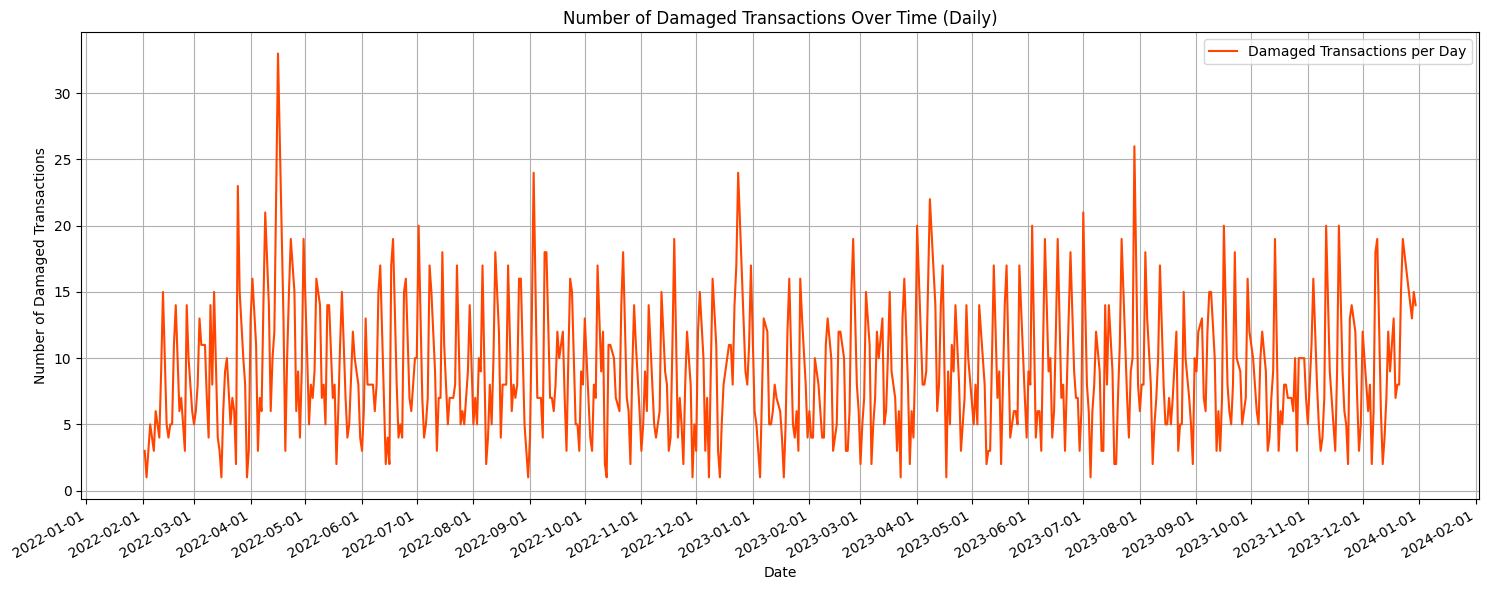

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
daily_damage_counts.plot(kind='line', ax=ax, label='Damaged Transactions per Day', color='orangered')
ax.set_title('Number of Damaged Transactions Over Time (Daily)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Damaged Transactions')
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

C:\Users\lol--\AppData\Local\Temp\ipykernel_6828\1435580514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_damage_counts.index, y=hourly_damage_counts.values, palette='autumn')


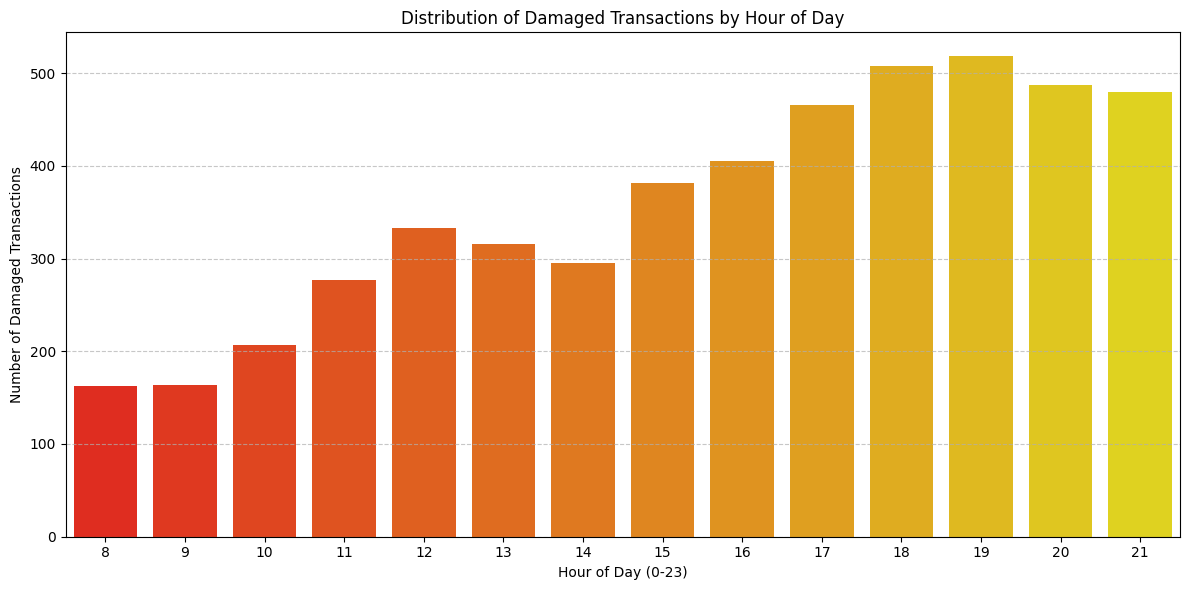

In [32]:
hourly_damage_counts = damaged_transactions_df['transaction_start'].dt.hour.value_counts().sort_index()


# Plotting the hourly distribution for damaged transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_damage_counts.index, y=hourly_damage_counts.values, palette='autumn')
plt.title('Distribution of Damaged Transactions by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Damaged Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\lol--\AppData\Local\Temp\ipykernel_6828\3745821589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_damage_counts.index, y=dow_damage_counts.values, palette='hot', order=day_order)


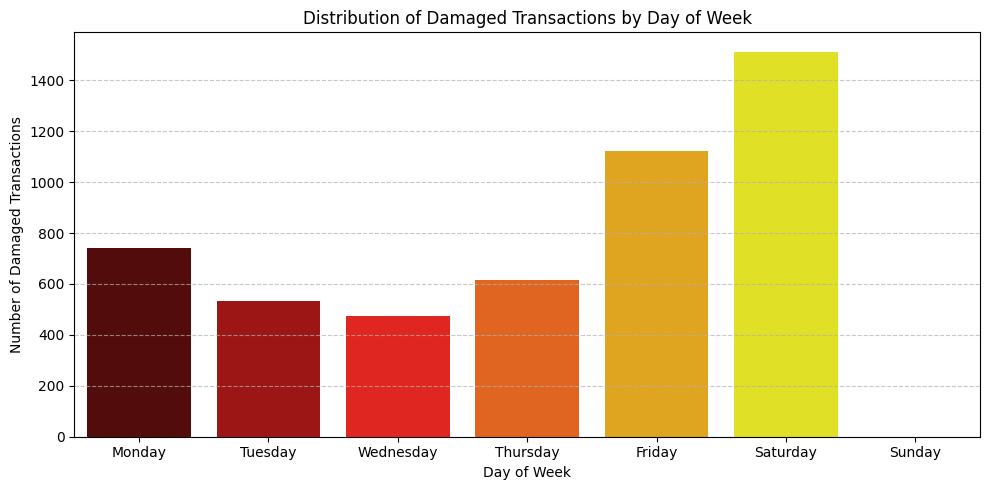

In [33]:

dow_damage_counts = damaged_transactions_df['transaction_start'].dt.day_name().value_counts()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_damage_counts = dow_damage_counts.reindex(day_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=dow_damage_counts.index, y=dow_damage_counts.values, palette='hot', order=day_order)
plt.title('Distribution of Damaged Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Damaged Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Erste Erkenntnisse und Profitestimation

Basierend auf der Analyse der bereitgestellten Transaktionsdaten (`transactions_train_source` mit 1.558.245 Einträgen) und der zugehörigen Transaktionszeilen (`transaction_lines_train_source` mit 16.620.157 Einträgen) lassen sich folgende erste Schlüsse ziehen:

**1. Datenqualität und -integrität:**
* Die Verknüpfung zwischen Transaktionszeilen und den Haupttransaktionen ist sehr robust. Nahezu jede Zeile konnte einer Transaktion zugeordnet werden.
* Es gibt lediglich 16 Transaktionen im Datensatz, die keine zugehörigen Produktzeilen aufweisen (z.B. leere oder stornierte Vorgänge).

**2. Transaktionsmuster:**
* Die Analyse deckt einen spezifischen Zeitraum ab (genaue Daten wurden ermittelt).
* Die zeitliche Verteilung der Transaktionen über den Tag, die Wochentage und den gesamten Zeitraum wurde analysiert und zeigt spezifische Muster auf (z.B. Stoßzeiten, ruhigere Tage).

**3. Klassifizierte Transaktionen und Betrug:**
* Ein Teil der Transaktionen (155.692) wurde bereits als 'NORMAL' (150.692) oder 'FRAUD' (5.000) klassifiziert. Der Großteil (1.402.553) ist noch als 'UNKNOWN' markiert.
* Der Anteil an Betrugsfällen ('FRAUD') innerhalb der klassifizierten Transaktionen beträgt **ca. 3,21 %**.

**4. Schadensanalyse:**
* Für 155.692 Transaktionen wurden explizite Schadenswerte erfasst (dies scheint mit den klassifizierten Transaktionen übereinzustimmen).
* Im Durchschnitt wurden **ca. 8,64 Schadensfälle pro Tag** registriert.
* Die Summe des *direkt erfassten* Schadens in diesen Fällen beträgt **39.345,07 €**.
* Dies entspricht einem durchschnittlichen Schaden von **ca. 0,25 € pro klassifizierter Transaktion**.

**5. Hochrechnung und Profitpotential:**
* Um das potenzielle Ausmaß über den gesamten Datensatz abzuschätzen, wurde der Durchschnittsschaden pro klassifizierter Transaktion (0,25 €) auf *alle* 1.558.245 Transaktionen hochgerechnet.
* Diese Hochrechnung ergibt einen **geschätzten Gesamtschaden von rund 393.785,54 €** für den analysierten Zeitraum.
* Diese Zahl illustriert das finanzielle Potenzial: Maßnahmen zur Reduzierung von Schäden (z.B. durch Prozessoptimierung, verbesserte Betrugserkennung) könnten den Profit entsprechend positiv beeinflussen.

Diese erste Analyse bietet eine solide Grundlage für weitere Detailuntersuchungen und die Entwicklung gezielter Strategien zur Optimierung.

## Konfusionsmatrix der Bon-Bewertung

|                       | **Vorhergesagt: Korrekt (Positiv)** | **Vorhergesagt: Inkorrekt (Negativ)** |
| :-------------------- | :---------------------------------- | :------------------------------------ |
| **Tatsächlich: Korrekt (Positiv)** | **True Positive (TP)** <br> Korrekt erkannt <br> *Bewertung: 0 €* | **False Negative (FN)** <br> Fälschlich als inkorrekt erkannt <br> *Bewertung: 10 € Schaden* |
| **Tatsächlich: Inkorrekt (Negativ)**| **False Positive (FP)** <br> Fälschlich als korrekt erkannt <br> *Bewertung: Schaden (Produktpreis)* | **True Negative (TN)** <br> Korrekt als inkorrekt erkannt <br> *Bewertung: 5 € Gewinn* |

In [ ]:
girlfired_at_home = False
get_drunk = "Lets get the fuck drnk!"

if not girlfired_at_home:
    get_drunk